# Esfandiar Kiani - DSP - HM06.2 (By library)

## Imports

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fftpack import dct

## File path

In [3]:
FILE_PATH = "D:/M.A/T1/DSP/Assignments/HM04/HM04 - Esfandiar.wav"

## Read file

In [4]:
y, sr = librosa.load(FILE_PATH, sr=16000)

## Defines

In [5]:
frame_size = 1024
hop_size = 512

## Functions

In [6]:
def autocorrelation_pitch(signal, sr, frame_size, hop_size, center_clipping=False):
    pitch_values = []
    for i in range(0, len(signal) - frame_size, hop_size):
        frame = signal[i:i + frame_size]
        if center_clipping:
            threshold = 0.7 * np.max(np.abs(frame))
            frame = np.where(frame > threshold, frame - threshold, frame)
            frame = np.where(frame < -threshold, frame + threshold, frame)
        r = np.correlate(frame, frame, mode='full')
        r = r[len(r) // 2:]
        peaks, _ = find_peaks(r)
        if len(peaks) > 0:
            pitch = sr / peaks[0]
            pitch_values.append(pitch)
        else:
            pitch_values.append(0)
    return pitch_values

In [7]:
def amdf_pitch(signal, sr, frame_size, hop_size):
    pitch_values = []
    for i in range(0, len(signal) - frame_size, hop_size):
        frame = signal[i:i + frame_size]
        amdf = np.array([np.sum(np.abs(frame[:-lag] - frame[lag:])) for lag in range(1, frame_size)])
        peaks, _ = find_peaks(-amdf)
        if len(peaks) > 0:
            pitch = sr / peaks[0]
            pitch_values.append(pitch)
        else:
            pitch_values.append(0)
    return pitch_values

In [8]:
def cepstrum_pitch(signal, sr, frame_size, hop_size):
    pitch_values = []
    for i in range(0, len(signal) - frame_size, hop_size):
        frame = signal[i:i + frame_size]
        spectrum = np.fft.fft(frame)
        log_spectrum = np.log(np.abs(spectrum) + 1e-12)
        cepstrum = np.fft.ifft(log_spectrum).real
        peaks, _ = find_peaks(cepstrum)
        if len(peaks) > 0:
            pitch = sr / peaks[0]
            pitch_values.append(pitch)
        else:
            pitch_values.append(0)
    return pitch_values

In [9]:
def smooth_pitch(pitch_values, window_size=5):
    smoothed = np.convolve(pitch_values, np.ones(window_size)/window_size, mode='same')
    return smoothed

In [13]:
pitch_autocorr = autocorrelation_pitch(y, sr, frame_size, hop_size)
pitch_autocorr_cc = autocorrelation_pitch(y, sr, frame_size, hop_size, center_clipping=True)
pitch_amdf = amdf_pitch(y, sr, frame_size, hop_size)
pitch_cepstrum = cepstrum_pitch(y, sr, frame_size, hop_size)

In [15]:
smoothed_autocorr = smooth_pitch(pitch_autocorr)
smoothed_autocorr_cc = smooth_pitch(pitch_autocorr_cc)
smoothed_amdf = smooth_pitch(pitch_amdf)
smoothed_cepstrum = smooth_pitch(pitch_cepstrum)

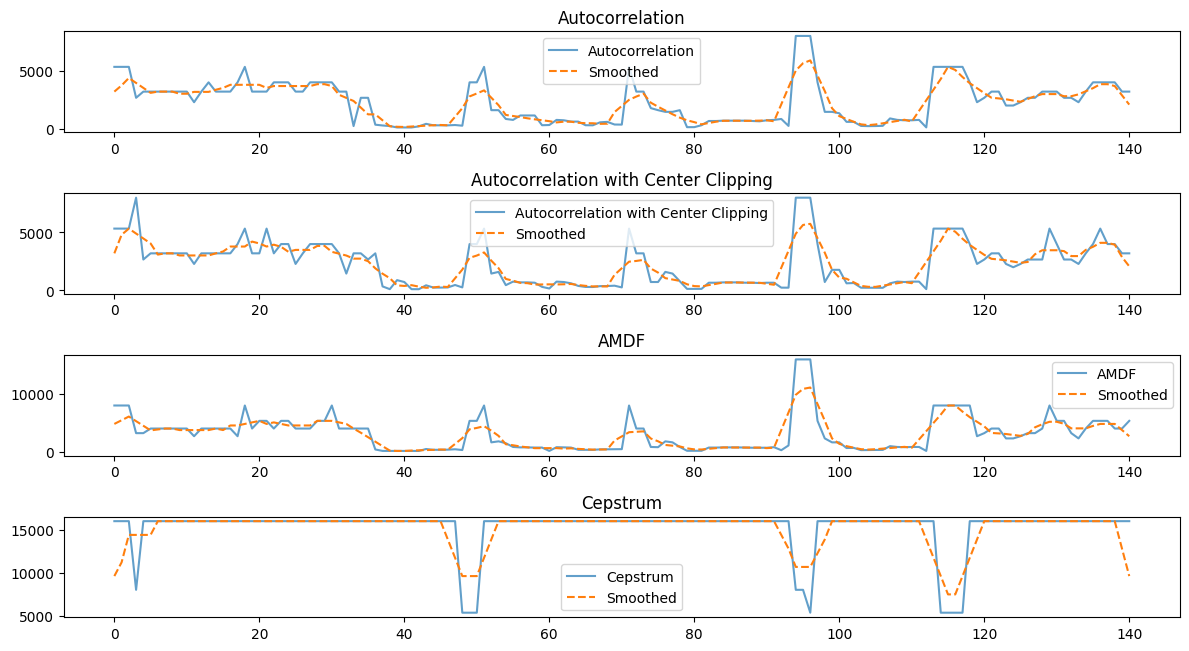

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(pitch_autocorr, label="Autocorrelation", alpha=0.7)
plt.plot(smoothed_autocorr, label="Smoothed", linestyle="--")
plt.title("Autocorrelation")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(pitch_autocorr_cc, label="Autocorrelation with Center Clipping", alpha=0.7)
plt.plot(smoothed_autocorr_cc, label="Smoothed", linestyle="--")
plt.title("Autocorrelation with Center Clipping")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(pitch_amdf, label="AMDF", alpha=0.7)
plt.plot(smoothed_amdf, label="Smoothed", linestyle="--")
plt.title("AMDF")
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(pitch_cepstrum, label="Cepstrum", alpha=0.7)
plt.plot(smoothed_cepstrum, label="Smoothed", linestyle="--")
plt.title("Cepstrum")
plt.legend()

plt.tight_layout()
plt.show()